In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("./data/final_db.csv")
df=df.drop(df.columns[0:2],axis=1)
df_copy=df.copy()
df.isna().sum()

sold_date          0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
need_renovation    0
state              0
city               0
dtype: int64

In [3]:
#df['city'] = df['city'].astype("string")
#df['state'] = df['state'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22616 entries, 0 to 22615
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sold_date        22616 non-null  object 
 1   price            22616 non-null  float64
 2   bedrooms         22616 non-null  int64  
 3   bathrooms        22616 non-null  int64  
 4   sqft_living      22616 non-null  int64  
 5   sqft_lot         22616 non-null  int64  
 6   floors           22616 non-null  int64  
 7   waterfront       22616 non-null  bool   
 8   view             22616 non-null  int64  
 9   condition        22616 non-null  int64  
 10  grade            22616 non-null  int64  
 11  sqft_above       22616 non-null  int64  
 12  sqft_basement    22616 non-null  float64
 13  yr_built         22616 non-null  float64
 14  yr_renovated     22616 non-null  float64
 15  zipcode          22616 non-null  int64  
 16  lat              22616 non-null  float64
 17  long        

In [4]:
df['sold_date'] = pd.to_datetime(df['sold_date'], format='%Y-%m-%d')
df["yr_renovated"]= df["yr_renovated"].astype(int)
df["yr_built"]= df["yr_built"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22616 entries, 0 to 22615
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sold_date        22616 non-null  datetime64[ns]
 1   price            22616 non-null  float64       
 2   bedrooms         22616 non-null  int64         
 3   bathrooms        22616 non-null  int64         
 4   sqft_living      22616 non-null  int64         
 5   sqft_lot         22616 non-null  int64         
 6   floors           22616 non-null  int64         
 7   waterfront       22616 non-null  bool          
 8   view             22616 non-null  int64         
 9   condition        22616 non-null  int64         
 10  grade            22616 non-null  int64         
 11  sqft_above       22616 non-null  int64         
 12  sqft_basement    22616 non-null  float64       
 13  yr_built         22616 non-null  int32         
 14  yr_renovated     22616 non-null  int32

In [5]:
df['city'] = df['city'].apply(
    lambda field:
      "Zcta" if 'Zcta' in field else field
    
)

df.city.value_counts()

city
Seattle           6795
Zcta              1691
Renton            1597
Woodinville       1271
Kent              1201
Bellevue          1090
Redmond            977
Kirkland           977
Tukwila            853
Federal way        779
Maple valley       589
Lk forest park     446
Issaquah           412
Algona             361
Beaux arts         317
Normandy park      311
Snoqualmie         308
Burien             288
Kenmore            283
Mercer island      282
Des moines         280
Enumclaw           233
North bend         220
Auburn             199
Bothell            195
Duvall             190
Carnation          124
Vashon             117
Black diamond      100
Fall city           80
Medina              50
Name: count, dtype: int64

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

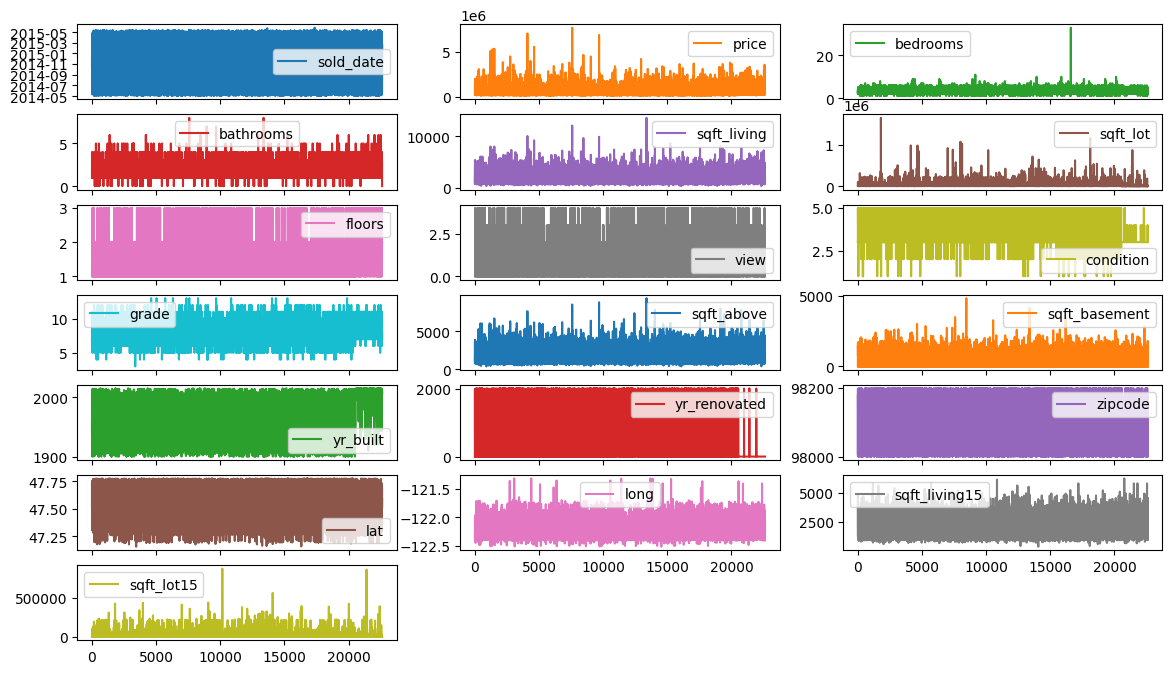

In [6]:
df.plot(subplots=True, layout=(7,3),figsize=(14,8))

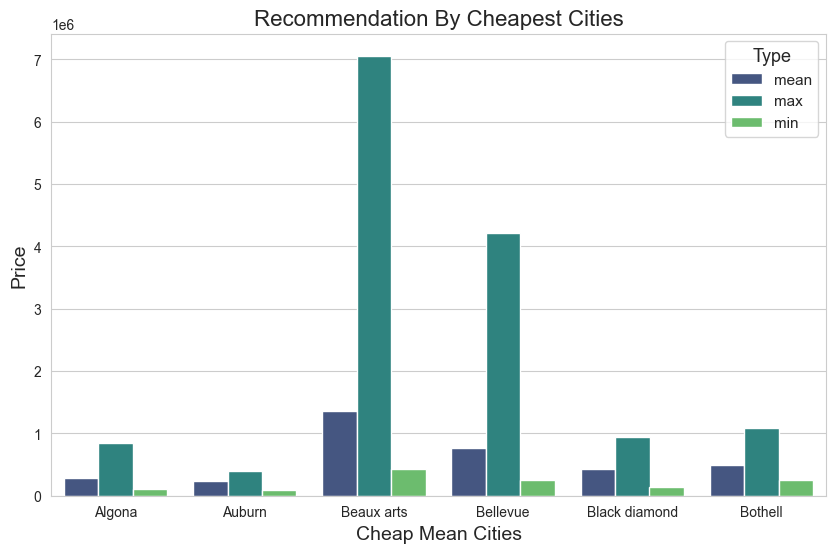

,city,level_1,price
0,Algona,mean,281194.870
1,Algona,max,850000.000
2,Algona,min,100000.000
3,Auburn,mean,234284.035
4,Auburn,max,389000.000
5,Auburn,min,95000.000
6,Beaux arts,mean,1356523.991
7,Beaux arts,max,7060000.000
8,Beaux arts,min,425000.000
9,Bellevue,mean,765251.077


In [7]:
#df.groupby(["city",'price'])['city'].apply(lambda x:x)
df_diff=df.groupby(["city"]).agg({'price': ['mean','max','min']}).stack().reset_index()[:18]
df_diff
#sns.barplot(data=df_diff,x='level_1', y='price',hue='city')
sns.set_style("whitegrid")

# Create a bar plot with hue
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=df_diff,hue='level_1', y='price',x='city', palette='viridis')

# Add title and labels
bar_plot.set_title('Recommendation By Cheapest Cities', fontsize=16)
bar_plot.set_xlabel('Cheap Mean Cities', fontsize=14)
bar_plot.set_ylabel('Price', fontsize=14)

# Customize the legend
plt.legend(title='Type', title_fontsize='13', fontsize='11')

# Show the plot
plt.show()
df_diff

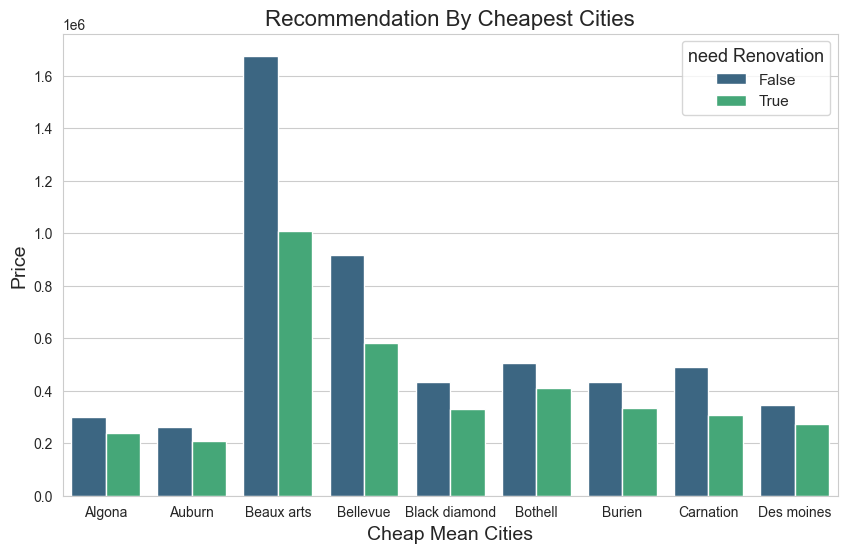

,city,need_renovation,level_2,price
0,Algona,False,mean,299302.555
1,Algona,True,mean,238210.271
2,Auburn,False,mean,260594.673
3,Auburn,True,mean,208754.901
4,Beaux arts,False,mean,1675773.667
5,Beaux arts,True,mean,1009970.066
6,Bellevue,False,mean,918013.229
7,Bellevue,True,mean,581627.885
8,Black diamond,False,mean,434160.622
9,Black diamond,True,mean,329214.300


In [8]:
df_diff=df.groupby(["city","need_renovation"]).agg({'price': ['mean']}).stack().reset_index()[:18]
df_diff
#sns.barplot(data=df_diff,x='level_1', y='price',hue='city')
sns.set_style("whitegrid")

# Create a bar plot with hue
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=df_diff,hue='need_renovation', y='price',x='city', palette='viridis')

# Add title and labels
bar_plot.set_title('Recommendation By Cheapest Cities', fontsize=16)
bar_plot.set_xlabel('Cheap Mean Cities', fontsize=14)
bar_plot.set_ylabel('Price', fontsize=14)

# Customize the legend
plt.legend(title='need Renovation', title_fontsize='13', fontsize='11')

# Show the plot
plt.show()
df_diff

<Axes: xlabel='grade', ylabel='city'>

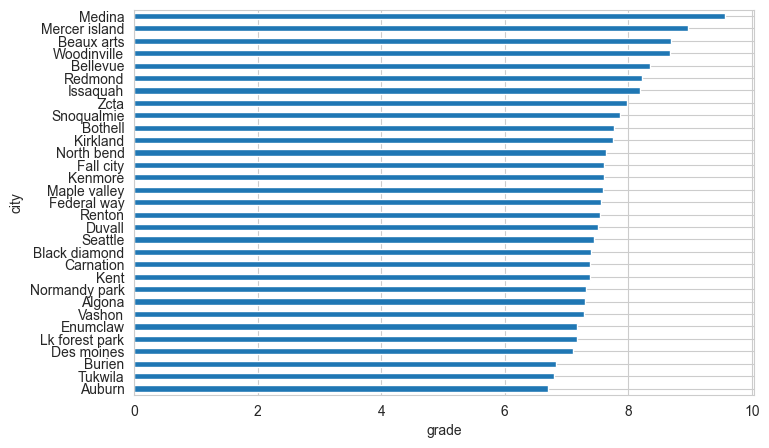

In [9]:
df.groupby(["city"])["grade"].mean().sort_values().plot.barh(xlabel="grade",x='city', y='grade', rot=0)


<Axes: xlabel='sqft_lot', ylabel='city'>

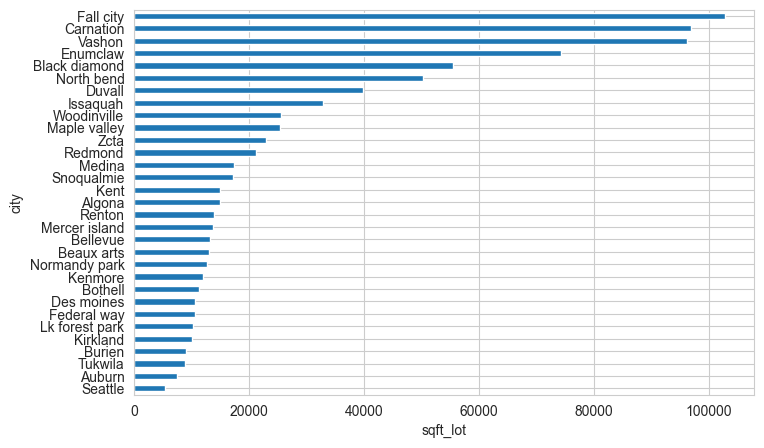

In [10]:
df.groupby(["city"])["sqft_lot"].mean().sort_values().plot.barh(xlabel="sqft_lot",x='city', y='sqft_lot', rot=0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


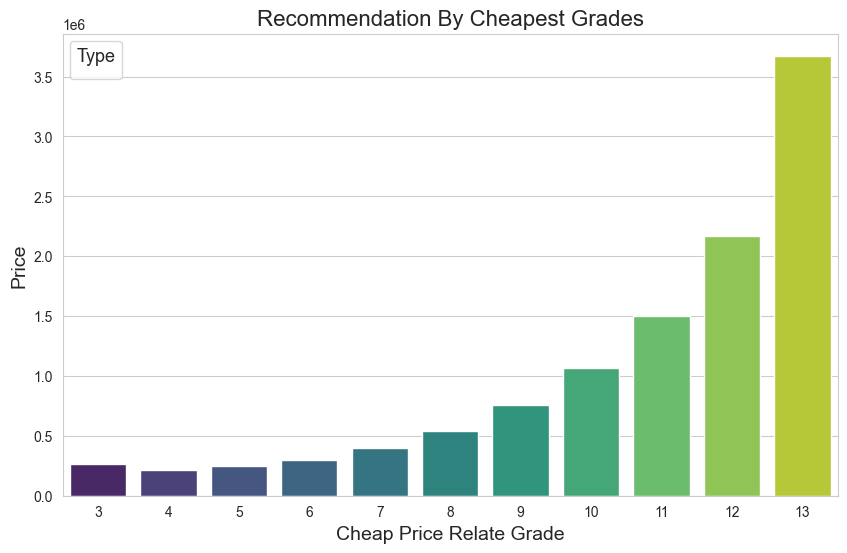

In [11]:
data_grade=df.groupby(["grade"])['price'].mean().sort_values().reset_index()[0:20]
#data_grade.plot.barh(xlabel="price",x='grade', y='price', rot=0)

sns.set_style("whitegrid")

# Create a bar plot with hue
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=data_grade,x='grade', y='price', palette='viridis')

# Add title and labels
bar_plot.set_title('Recommendation By Cheapest Grades', fontsize=16)
bar_plot.set_xlabel('Cheap Price Relate Grade', fontsize=14)
bar_plot.set_ylabel('Price', fontsize=14)

# Customize the legend
plt.legend(title='Type', title_fontsize='13', fontsize='11')

# Show the plot
plt.show()

<Axes: xlabel='waterfront probability', ylabel='grade'>

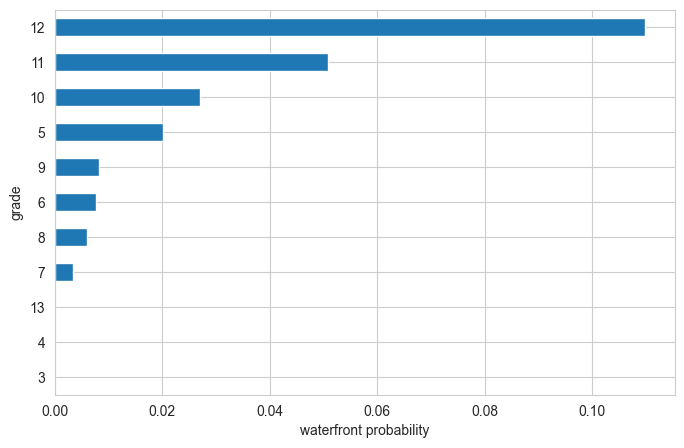

In [12]:
df.groupby(["grade"])["waterfront"].mean().sort_values().plot.barh(xlabel="waterfront probability", x='grade', y='waterfront', rot=0)

In [13]:
df['sold_year']=df['sold_date'].dt.year
df['sold_month']=df['sold_date'].dt.month

df.head()

,sold_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,need_renovation,state,city,sold_year,sold_month
0,2014-10-13,221900.000,3,1,1180,5650,1,False,0,3,7,1180,0.000,1955,0,98178,47.511,-122.257,1340,5650,True,Washington,Tukwila,2014,10
1,2014-12-09,538000.000,3,2,2570,7242,2,False,0,3,7,2170,400.000,1951,1991,98125,47.721,-122.319,1690,7639,False,Washington,Seattle,2014,12
2,2015-02-25,180000.000,2,1,770,10000,1,False,0,3,6,770,0.000,1933,0,98028,47.738,-122.233,2720,8062,True,Washington,Kenmore,2015,2
3,2014-12-09,604000.000,4,3,1960,5000,1,False,0,5,7,1050,910.000,1965,0,98136,47.521,-122.393,1360,5000,True,Washington,Seattle,2014,12
4,2015-02-18,510000.000,3,2,1680,8080,1,False,0,3,8,1680,0.000,1987,0,98074,47.617,-122.045,1800,7503,False,Washington,Woodinville,2015,2


,yr_built,level_1,price,grade,view,need_renovation
43,1943,mean,342253.478,6.348,0.225,True
44,1944,mean,367941.207,6.427,0.093,True
42,1942,mean,386693.373,6.403,0.129,True
69,1969,mean,407680.085,7.157,0.127,False
61,1961,mean,423004.759,7.139,0.194,True
...,...,...,...,...,...,...
37,1937,mean,702554.062,7.487,0.713,True
101,2001,mean,737088.540,8.642,0.233,False
115,2015,mean,751247.400,8.925,0.125,False
5,1905,mean,753443.932,7.473,0.257,True


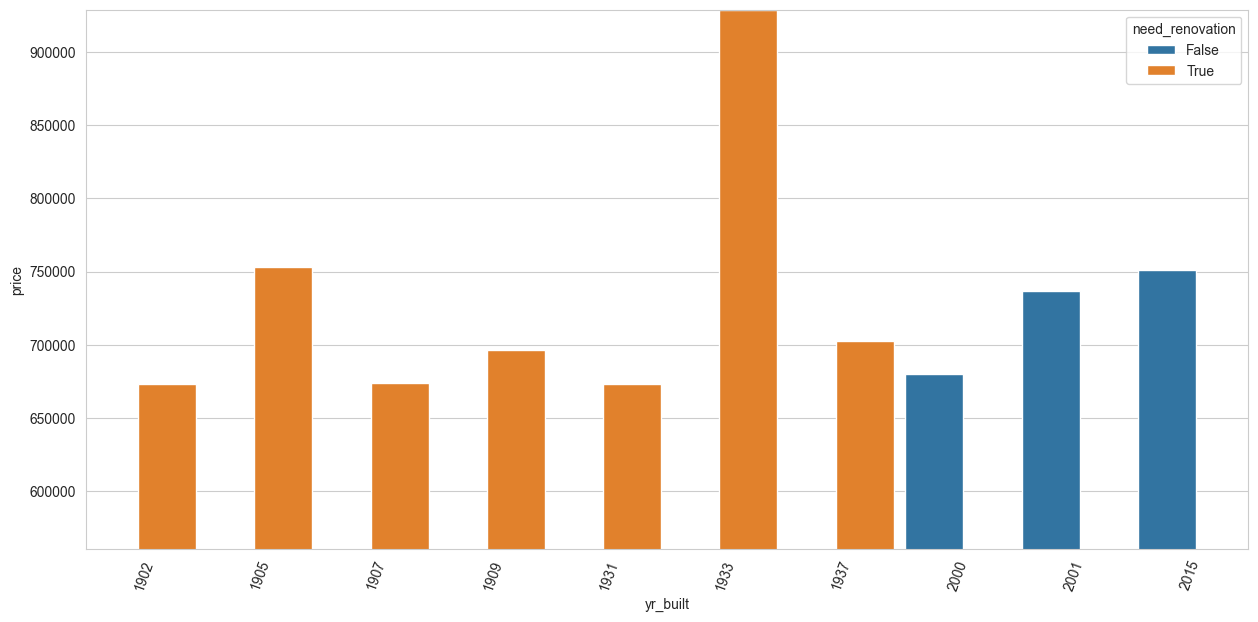

In [14]:
df_yr_built=df.groupby(["yr_built"]).agg({'price': ['mean'],
                                          'grade': ['mean'],
                                          'view': ['mean'],
                                          'need_renovation':['mean']}).stack().reset_index().sort_values(by="price")
f, axes = plt.subplots(1, 1, figsize=(15, 7))
axes.tick_params(axis='x', rotation=70)
df_yr_built.need_renovation=df_yr_built.need_renovation>.4
bar_plot=sns.barplot(df_yr_built[-10:], x="yr_built", y="price",hue="need_renovation",ax=axes,orient='v')

bar_plot.set_ylim(df_yr_built[-10:].price.min()/1.2,df_yr_built[-10:].price.max())
#sns.barplot(df_date.loc[:9], x="sold_month", y="price",ax=axes[1], alpha=.7)
for patch in bar_plot.patches:
    current_width = patch.get_width()
    diff = current_width - 0.5
    # Change the bar width
    patch.set_width(0.5)
    # Recenter the bar
    patch.set_x(patch.get_x() + diff * .5)


df_yr_built

In [15]:
#df_g=df.groupby(["city"]).agg({'price': ['mean', 'min', 'max'],'grade': ['mean', 'min', 'max'],'view': ['mean', 'min', 'max'],'need_renovation':['mean']})
df_g=df.groupby(["city"]).agg({'price': ['mean'],'grade': ['mean'],'view': ['mean'],'need_renovation':['mean']})
df_g=df_g.stack().reset_index().sort_values(by=["price",'grade']).drop(axis=1,columns='level_1')
df_date=df.groupby(["sold_year","sold_month"]).agg({'price': ['mean']}).stack().reset_index().sort_values(by=["sold_year",'sold_month']).drop(axis=1,columns='level_2')
df_date

,sold_year,sold_month,price
0,2014,5,545780.671
1,2014,6,553326.934
2,2014,7,540950.072
3,2014,8,535156.994
4,2014,9,530265.161
5,2014,10,540441.165
6,2014,11,518350.538
7,2014,12,520177.186
8,2015,1,521222.880
9,2015,2,505653.509


(504653.5091463415, 558710.5012809564)

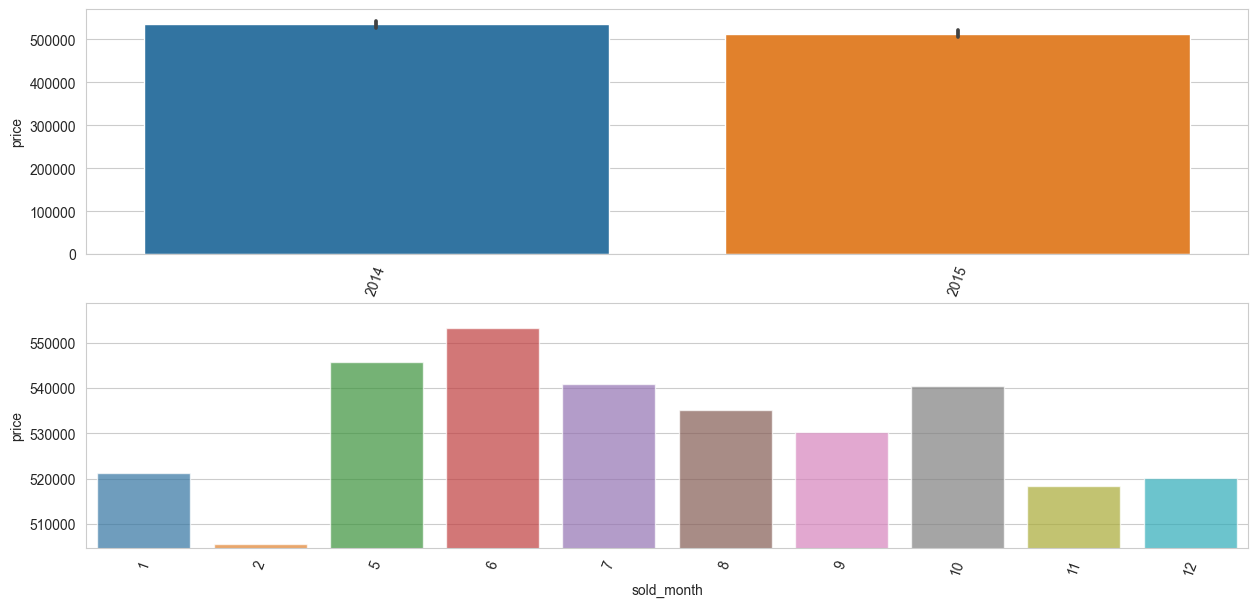

In [16]:
f, axes = plt.subplots(2, 1, figsize=(15, 7))
[x.tick_params(axis='x', rotation=70) for x in axes]
sns.barplot(df_date.loc[:9], x="sold_year", y="price",ax=axes[0])
plt.ylim(df_date.price.max()-1000, df_date.price.max())

sns.barplot(df_date.loc[:9], x="sold_month", y="price",ax=axes[1], alpha=.7)
plt.ylim(df_date.price.min()-1000, df_date.price.max())


<Axes: xlabel='city', ylabel='grade'>

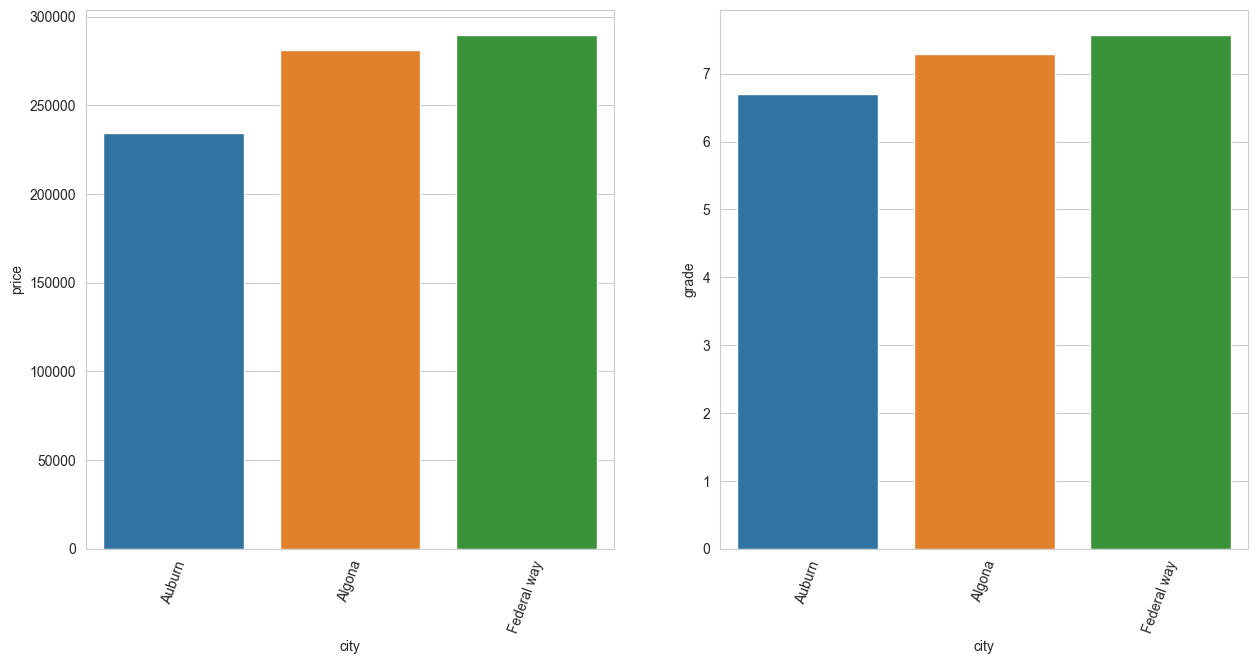

In [17]:

f, axes = plt.subplots(1, 2, figsize=(15, 7))
[x.tick_params(axis='x', rotation=70) for x in axes]
sns.barplot(df_g.loc[:12], x="city", y="price",ax=axes[0])
sns.barplot(df_g.loc[:12], x="city", y="grade",ax=axes[1])


array([ True,  True,  True, False, False,  True, False,  True,  True,
        True, False, False, False,  True, False,  True, False, False,
       False])

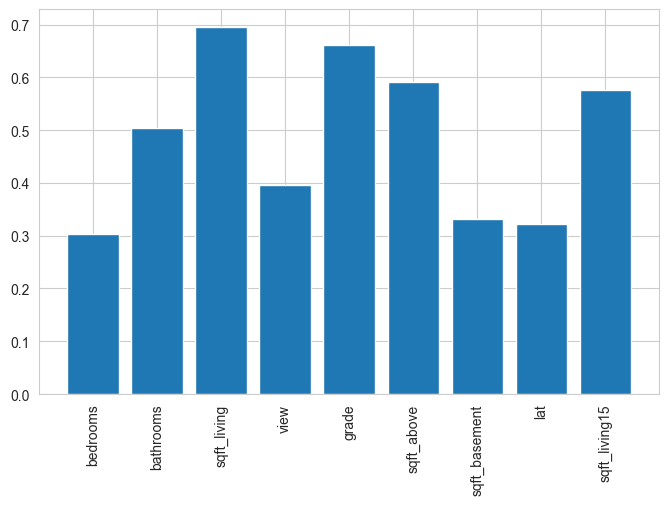

In [18]:

plt.xticks(rotation=90)
corr =pd.DataFrame( np.sqrt(df.select_dtypes(include='number').corr()**2))
for i in corr.iterrows():
    ii=i[1][1:].values>.3
    plt.bar(x=i[1][1:].index[ii],height=i[1][1:].values[ii])
    break;
ii

Text(0.5, 1.0, 'Correlation Heatmap')

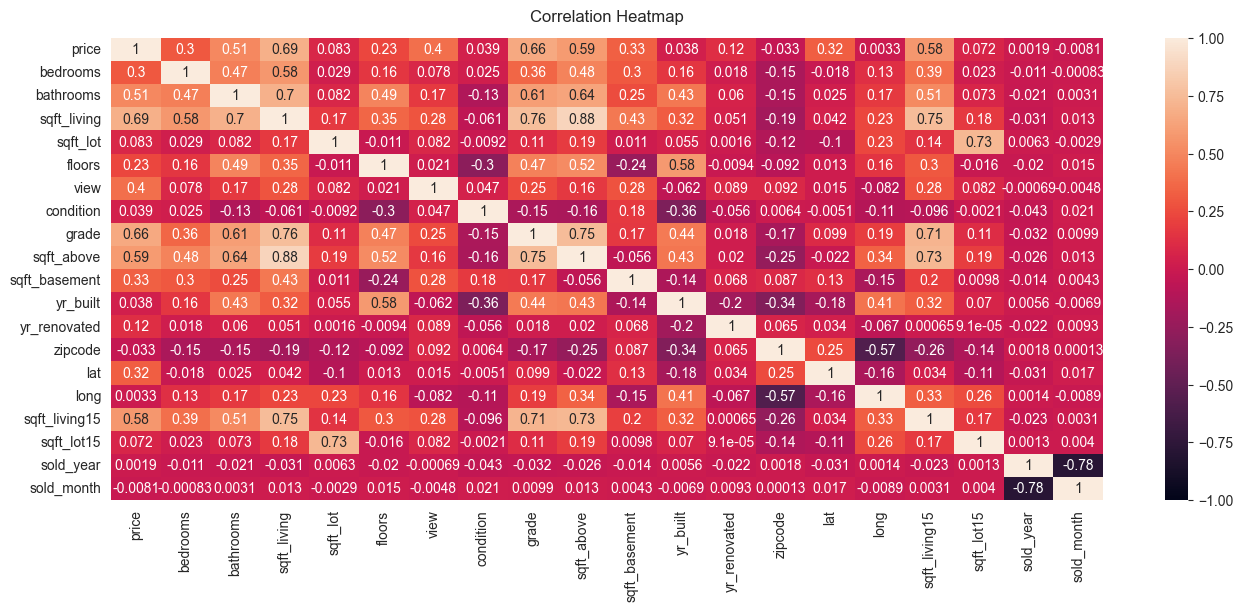

In [19]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.select_dtypes(include='number').corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [23]:
cities = ["Algona","Auburn","Beaux","Bellevue"]
rec_df=df[(df.grade<7)&(df.city.isin(cities))].sort_values(by=["need_renovation","price","grade","yr_built"])[:4]
rec_df

,sold_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,need_renovation,state,city,sold_year,sold_month
21933,2015-03-11,110000.000,2,1,828,4524,1,False,0,3,6,828,0.000,1968,2007,98001,47.266,-122.244,828,5402,False,Washington,Algona,2015,3
16712,2014-10-16,154000.000,3,3,1530,9997,1,False,0,3,6,1020,510.000,1992,0,98001,47.286,-122.252,1410,9997,False,Washington,Algona,2014,10
14640,2015-01-29,160000.000,2,1,1070,4200,1,False,0,4,6,1070,0.000,1983,0,98002,47.334,-122.215,1150,4200,False,Washington,Auburn,2015,1
14976,2014-07-28,167000.000,3,1,1280,5547,2,False,0,4,6,1280,0.000,1985,0,98002,47.334,-122.215,1150,4500,False,Washington,Auburn,2014,7


In [24]:
html = rec_df.to_html(classes='table table-striped table-hover', index=False)

# Custom CSS for styling
css = """
<style>
    .table {
        width: 100%;
        max-width: 100%;
        margin-bottom: 1rem;
        background-color: transparent;
    }
    .table th,
    .table td {
        padding: 0.75rem;
        vertical-align: top;
        border-top: 1px solid #dee2e6;
    }
    .table thead th {
        vertical-align: bottom;
        border-bottom: 2px solid #dee2e6;
    }
    .table tbody + tbody {
        border-top: 2px solid #dee2e6;
    }
    .table .table {
        background-color: #fff;
    }
    .table-striped tbody tr:nth-of-type(odd) {
        background-color: rgba(0, 0, 0, 0.05);
    }
    .table-hover tbody tr:hover {
        background-color: rgba(0, 0, 0, 0.075);
    }
</style>
"""

# Combine HTML and CSS
html = css + html

# Save to an HTML file
with open('dataframe.html', 'w') as f:
    f.write(html)

print("HTML file created successfully.")

HTML file created successfully.
